# Day 01 — Linear Regressor: SyntheticForge
### Simple Linear Regression on a Synthetic Dataset

This notebook covers:

- Creating a synthetic regression dataset  
- Exploratory Data Analysis (EDA)  
- Training a Linear Regression model  
- Evaluating the model with common error metrics  
- Visualizing the regression line vs actual data  

We will generate data based on the function: ```y = 3x + 4 + noise```

## Setup & Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Display setup
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (10, 5)

print("Environment ready.")

Environment ready.


## Data Generation

In [3]:
# Reproducibility
np.random.seed(42)

# Feature creation
X = np.linspace(0, 50, 200)

# Noise & target creation
noise = np.random.normal(0, 8, len(X))
y = 3*X + 4 + noise

# DataFrame
df = pd.DataFrame({"Feature_X": X, "Target_y": y})
df.head()

,Feature_X,Target_y
0,0.000000,7.973713
1,0.251256,3.647654
2,0.502513,10.689046
3,0.753769,18.445545
4,1.005025,5.141848


## Save & Inspect Data

In [4]:
import os

os.makedirs("../data", exist_ok=True)
df.to_csv("../data/synthetic_data.csv", index=False)

print("Dataset saved to ../data/synthetic_data.csv")
df.info()
df.describe()

Dataset saved to ../data/synthetic_data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_X  200 non-null    float64
 1   Target_y   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


,Feature_X,Target_y
count,200.000000,200.000000
mean,25.000000,78.673832
std,14.542509,44.778628
min,0.000000,-1.507247
25%,12.500000,39.918194
50%,25.000000,77.771226
75%,37.500000,118.290561
max,50.000000,160.685976


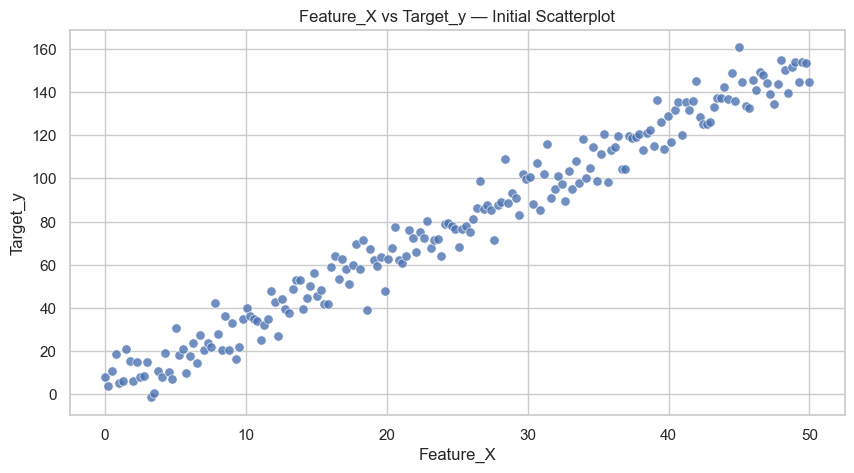

In [5]:
plt.figure()
sns.scatterplot(data=df, x="Feature_X", y="Target_y", s=45, alpha=0.8)
plt.title("Feature_X vs Target_y — Initial Scatterplot")
plt.show()

In [7]:
X_var = df[["Feature_X"]]  # 2D for sklearn
y_var = df["Target_y"]     # 1D target

X_train, X_test, y_train, y_test = train_test_split(
    X_var, y_var, test_size=0.2, random_state=42
)

print(f"Train samples: {len(X_train)} | Test samples: {len(X_test)}")

Train samples: 160 | Test samples: 40


In [8]:
#Model Training
model = LinearRegression()
model.fit(X_train, y_train)

slope = model.coef_[0]
intercept = model.intercept_

print("Model trained successfully.")
print(f"Slope     : {slope:.3f}")
print(f"Intercept : {intercept:.3f}")


Model trained successfully.
Slope     : 3.027
Intercept : 2.824


In [13]:
#Prediction & Comparison Table
y_pred = model.predict(X_test)

comparison_df = pd.DataFrame({
    "X_Value": X_test["Feature_X"],
    "Actual_y": y_test,
    "Predicted_y": y_pred
}).reset_index(drop=True)

comparison_df.head(10)

,X_Value,Actual_y,Predicted_y
0,23.869347,63.899921,75.075871
1,3.768844,10.808232,14.232413
2,7.537688,21.799412,25.640561
3,39.698492,113.565049,122.990094
4,32.160804,101.279623,100.173797
5,28.894472,93.095796,90.286735
6,17.336683,50.849092,55.301747
7,42.713568,125.024588,132.116613
8,43.718593,137.369305,135.158785
9,11.306533,32.160844,37.048710


In [16]:
#Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

metrics_summary = pd.DataFrame({
    "MSE":[mse], 
    "MAE":[mae], 
    "R²":[r2]
})

print("Model Performance Summary")
display(metrics_summary.style.background_gradient(cmap="Blues"))

Model Performance Summary


,MSE,MAE,R²
0,49.402571,5.864897,0.969865


### Regression Fit Plot

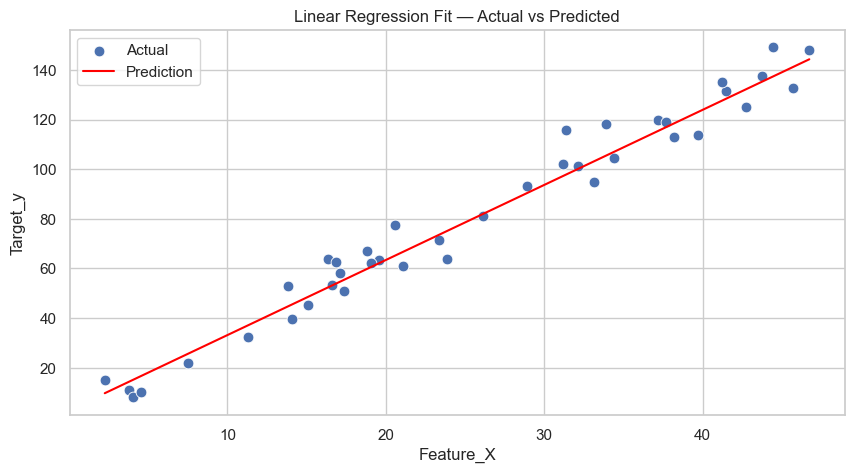

In [17]:
plt.figure()
sns.scatterplot(x=X_test.squeeze(), y=y_test, label="Actual", s=60)
sns.lineplot(x=X_test.squeeze(), y=y_pred, color="red", label="Prediction")
plt.title("Linear Regression Fit — Actual vs Predicted")
plt.xlabel("Feature_X"); plt.ylabel("Target_y")
plt.legend()
plt.show()

## Model Interpretation

| Parameter | Meaning |
|-----------|----------|
| Slope     | For every +1 increase in X, Y increases by approximately the slope value |
| Intercept | Predicted Y when X = 0 |
| R² Score  | How well the model explains variance (closer to 1 = better) |

**Our Model Indicates:**
- The learned slope is very close to the true slope `3`
- Noise successfully simulated real-world uncertainty
- The model fits well, supported by a strong R² score

---

In [19]:
import joblib
os.makedirs("../models", exist_ok=True)
joblib.dump(model, "../models/linear_regressor_syntheticforge.pkl")
print("Model saved as ../models/linear_regressor_syntheticforge.pkl")

Model saved as ../models/linear_regressor_syntheticforge.pkl


## Summary
- How to simulate a dataset
- Why regression assumes linearity
- How to evaluate a regression model properly
- Where visual diagnostics matter (e.g., residual plots)
---
